# 1. Introduction and Project Statement
Our project focuses on diagnosing the health of fetus though analyzing data gathered from feti to determine if a  fetus is infected with some sort of disease. This can potentially be helpful in early diagnoses of diseases in fetuses to prevent maternal mortality; 94% of the 295,000 deaths (as of 2017) during and following pregnancy and childbirth could have been prevented if the fetus was correctly diagnosed. Each datapoint has 21 features like heartrate, fetus movements, acceleration, and deceleration. With each datapoint, there is a diagnostic given by three experts that falls into one of three categories: normal health, are suspected of carrying disease, or are confirmed to be carrying a pathological disease; We would be predicting one of the multi-class labels base off the 2126 datapoints from Kaggle.

# 2. Related Work
On Kaggle, there have been other submissions that uses a multitude of multiclass classifier models to solve the problem including Logistic Regression, Decision Trees, Random Forest, Naive Bayes, and more. With this assorted methods of classification for this problem, we wanted to try if Knn proves to be a much too simple methodology. On top of that, we wanted to see if a Multi-layer Perceptron(MLP) would be much more accurate than Knn. 

Other previous works includes this relatively recent article "[Fetal Health Classification from Cardiotocograph for Both Stages of Labor—A Soft-Computing-Based Approach](https://www.mdpi.com/2075-4418/13/5/858)" where it also recognizes the difficulty on using cardiotocography (recording of the fetal heartbeat and the uterine contractions during pregnancy) data from the first stage and the second stage of labor. In this article, they used standard classification methods like Support Vector Machines(SVM) and Random Forest(RF) and achieved 97.5% and 98% accuracy on prediction for the first stage of labor. In second stage of labor, SVM and RF's performance became 90.6% and 89.3% respectively. Although this paper's MLP performed less well than its RF and SVM models, we wanted to try if there are other configuration of MLP with out dataset that can improve upon their performances.


# 3. Dataset
Our dataset comes from the Kaggle competition [Fetal Health Classificatoin](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification), where 2126 datapoints are given with 21 features that was classified by three experts to categorize each datapoint into one of three labels: Normal, Suspect, and Pathological.

The features of the datapoints are:
 1. Baseline Fetal Heart Rate(FHR)
 2. Number of acceleration per second
 3. Number of fetal movements per second
 4.  Number of uterine contractions per second
 5. Number of light decelerations(LDs) per second
 6. Number of severe decelerations(SDs) per second
 7. Number of prolongued decelerations(PDs) per second
 8. Percentage of time with abnormal short term variability
 9. Mean value of short term variability
 10. Percentage of time with abnormal long term variability
 11. Mean value of long term variability
 12. Width of the histogram made using all values from a record
 13. Histogram minimum value
 14. Histogram maximum value
 15. Number of peaks in the exam histogram
 16. Number of zeroes in the exam histogram
 17. Histogram mode
 18. Histogram mean
 19. Histogram median
 20. Histogram variance
 21. Histogram trend

There are quite a number of features in the dataset that isn't exactly clear to us, for instance the "histogram" it is referring to isn't explained in the Kaggle competition. So we wanted to see how relevant with their contribution to the prediction compare to other features that seem to have more relevance on the surface level: features like heart rates, acceleration, and deceleration.

#### Here are some graphical representation for all features.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df = pd.read_csv("C:\\Users\\jeffr\\Desktop\\cs184A\\FetusHealthML\\Project\\fetal_health.csv")
display(df)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


#### Histograms of all features

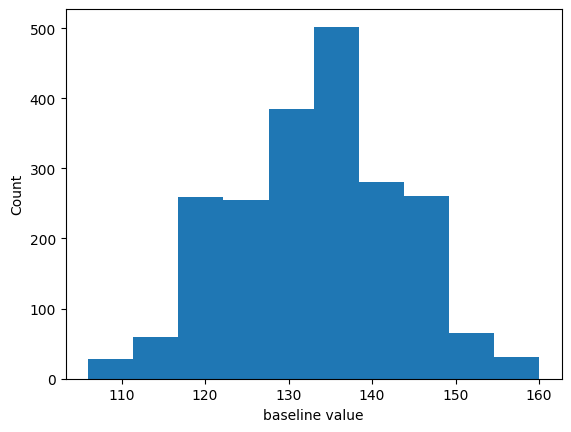

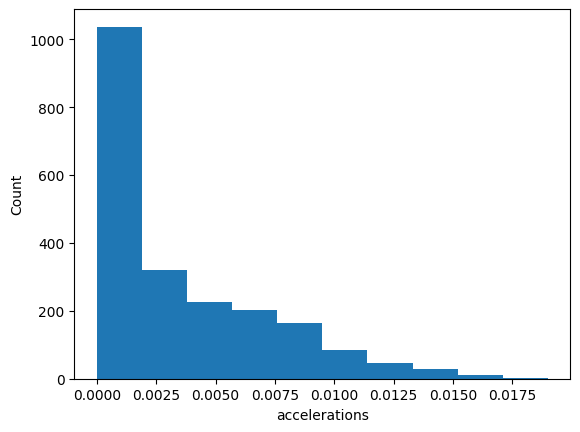

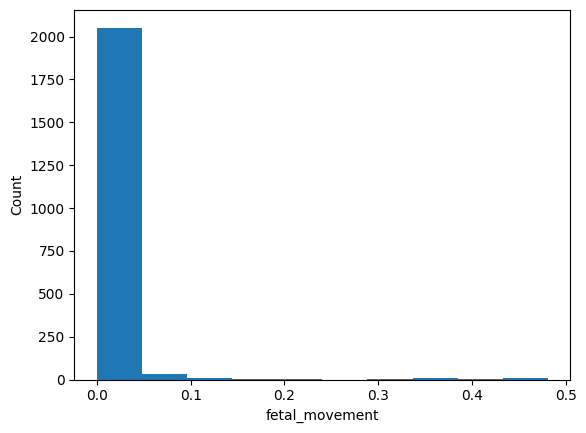

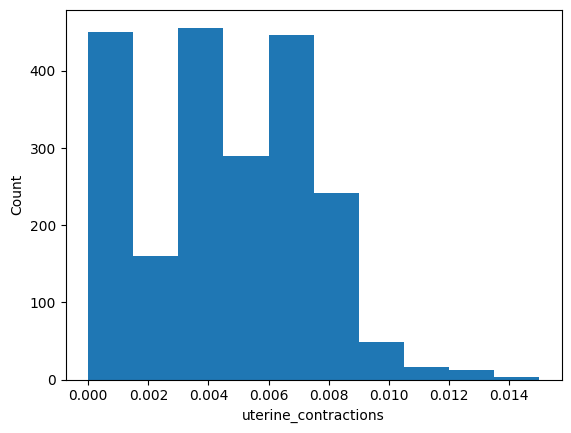

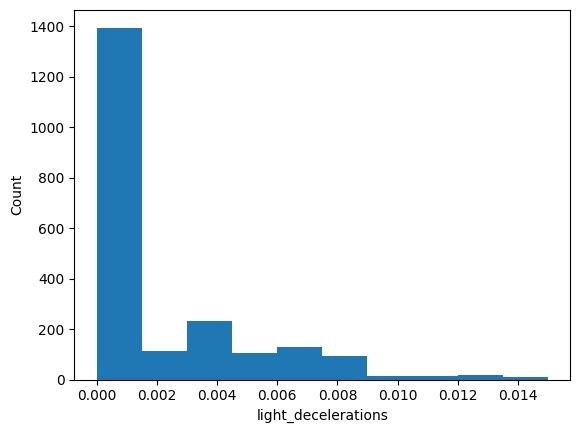

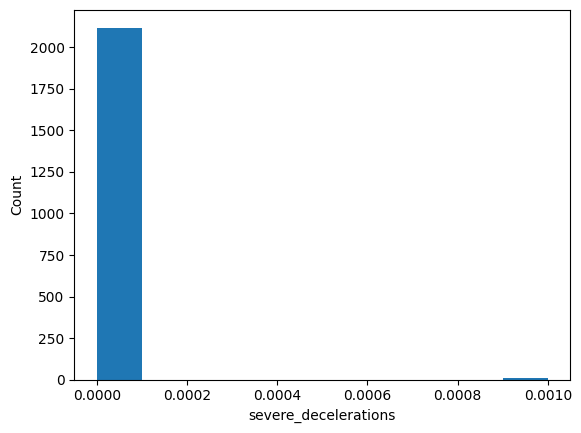

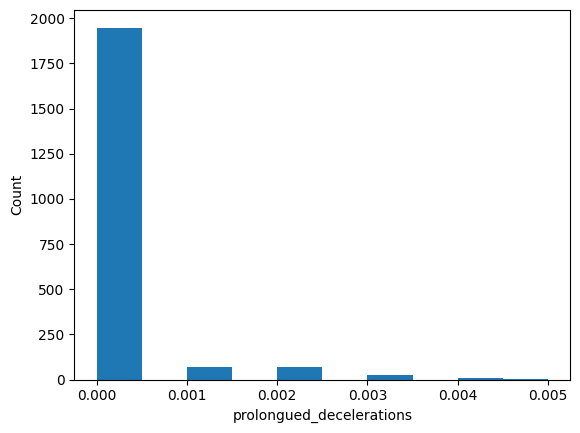

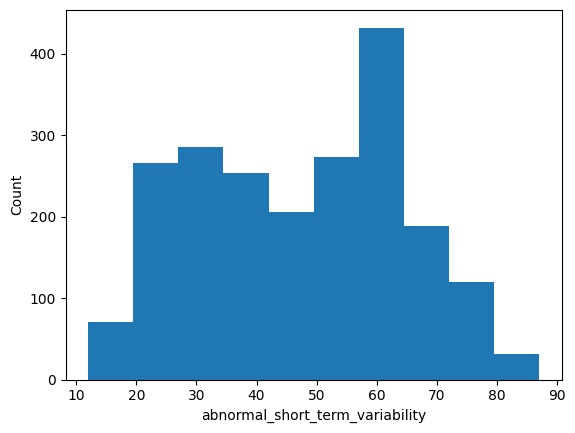

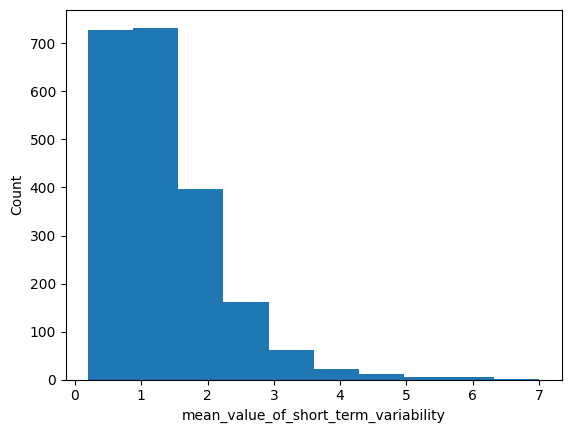

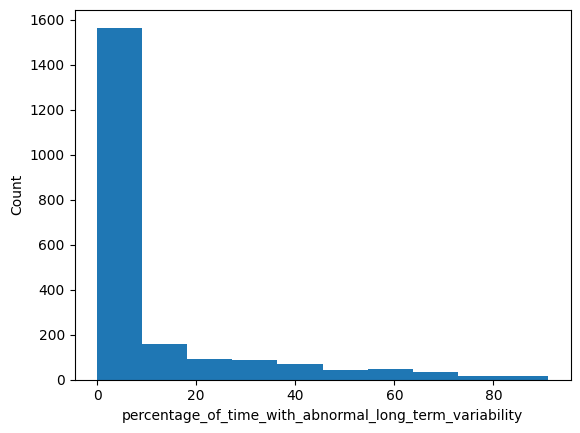

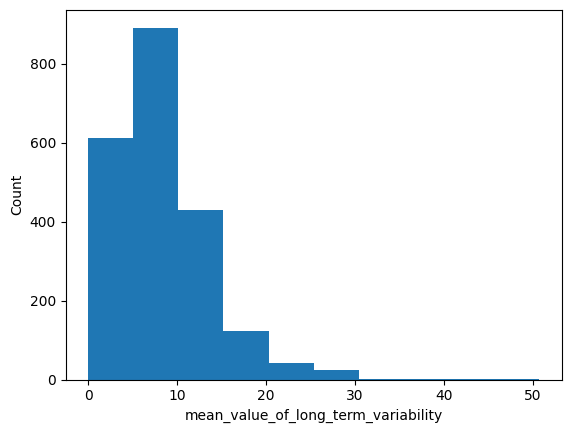

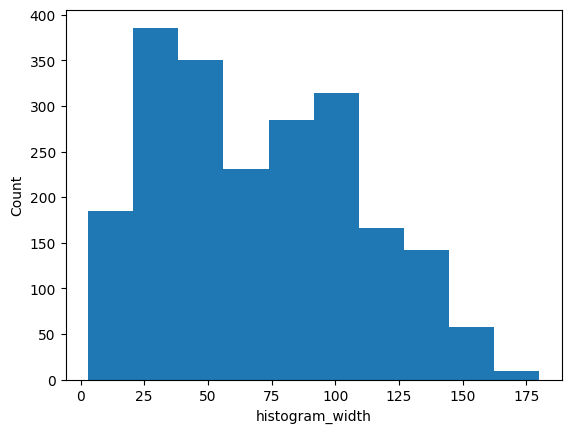

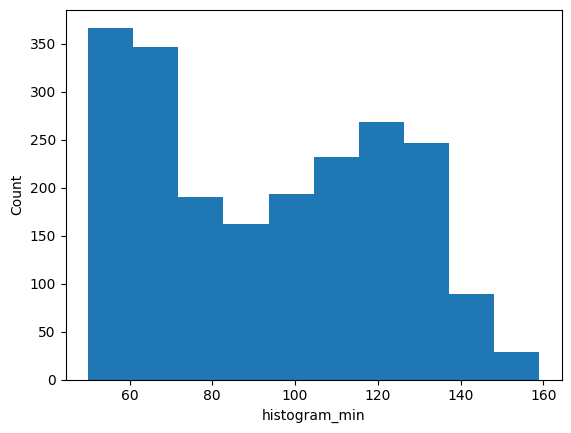

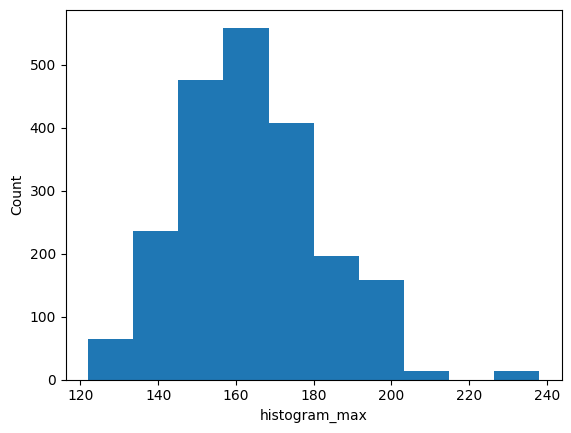

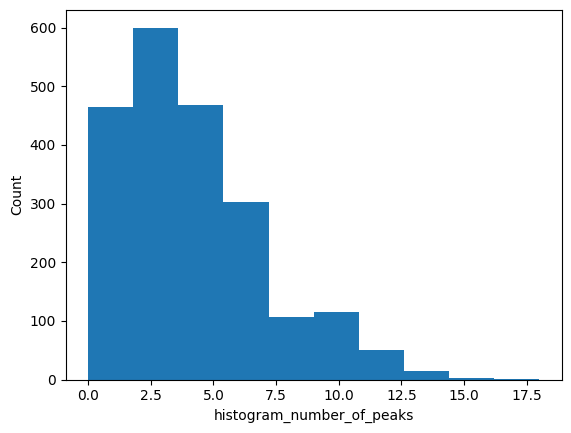

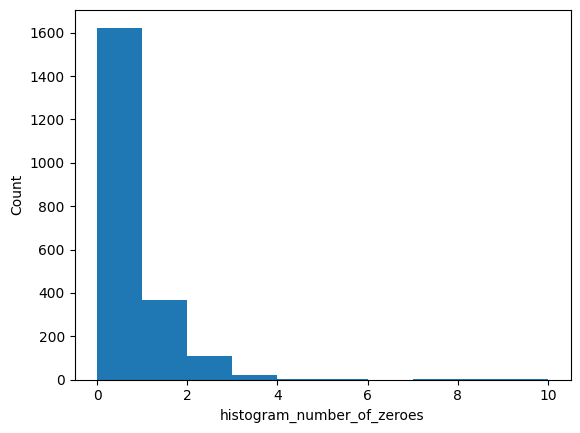

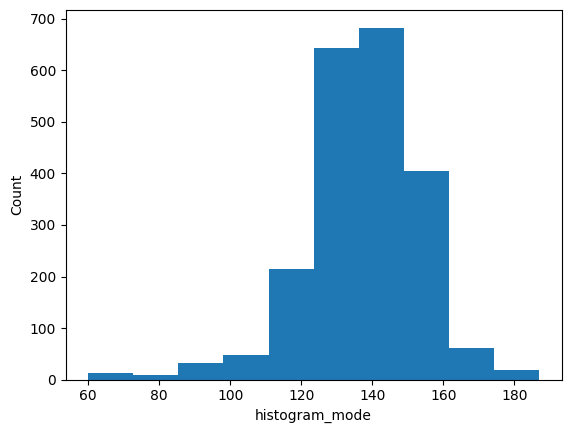

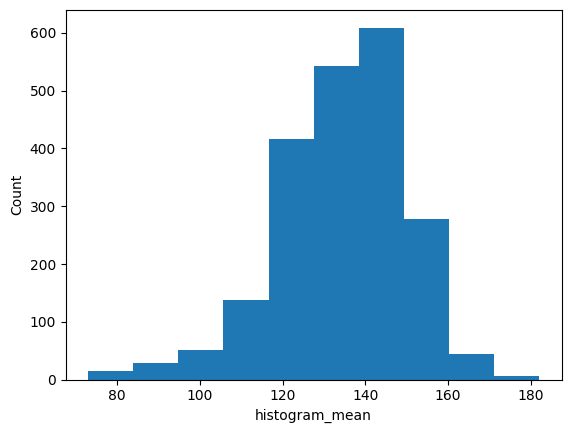

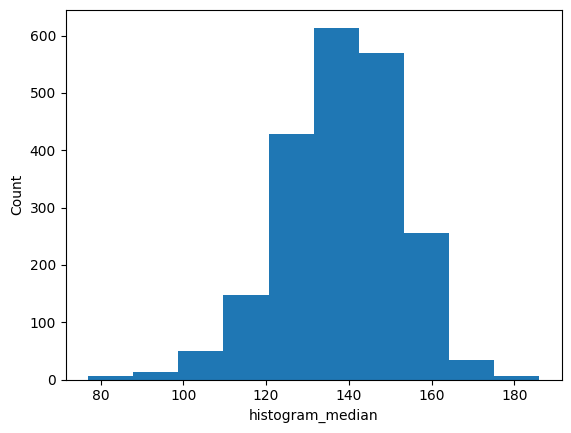

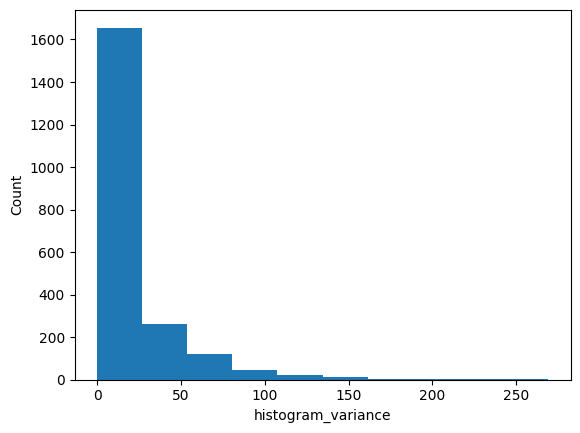

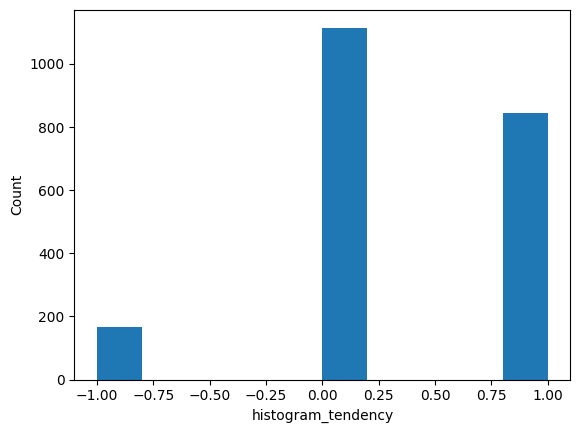

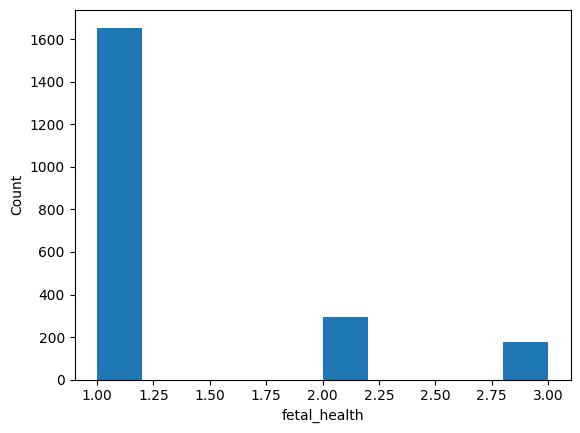

In [36]:
for features in df:
    plt.hist(df[features])
    plt.xlabel(features)
    plt.ylabel("Count")
    plt.show()

#### 